# membrane module example
This example demonstrates the following steps:
+ raw parameter data
+ initialize model
+ run model
+ calibrate model
+ post-process model results

In [1]:
%matplotlib inline
import numpy as np
from rational_rc.membrane import MembraneModel

In [2]:
# Raw Parameter Data for Membrane Model
class Param: 
    pass

raw_pars = Param()

# Product information
raw_pars.life_product_label_life = 10   # Expected life of membrane (years), defined as 95% confident non-failure
raw_pars.life_std = 0.2 * raw_pars.life_product_label_life  # Assumed standard deviation, calibrate later
raw_pars.life_confidence = 0.95         # Confidence level for product life

# Field survey data for calibration (if available)
raw_pars.membrane_failure_ratio_field = 0.01  # Observed failure ratio from the field survey
raw_pars.membrane_age_field = 5  # Age of the membrane from field data in years

Pf(g = R-S < 0) from various methods
    sample count: 0.04928
    g integral: 0.05009698096782609
    R S integral: 0.05000000000001138
    beta_factor: 1.6517009159422122


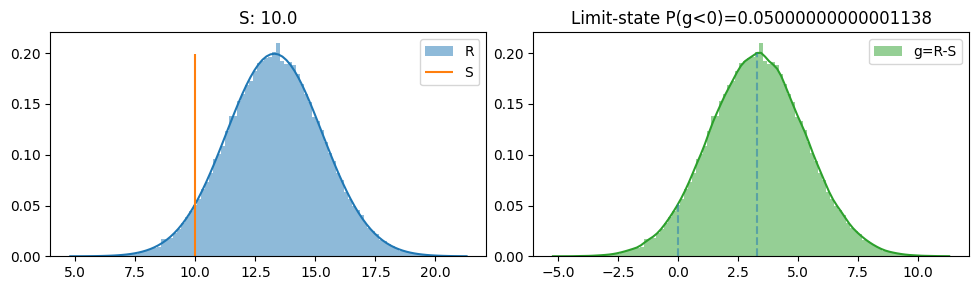

In [3]:
# Initialize the Membrane Model with raw parameters
mem_model = MembraneModel(raw_pars)

# Run the membrane model for 10 years (uncalibrated)
mem_model.run(10)

# Post-process and plot the results
mem_model.postproc(plot=True)

In [4]:
# Calibrate the membrane model using field data
# Calibration based on membrane age and observed failure ratio from the field survey
mem_model_cal = mem_model.calibrate(raw_pars.membrane_age_field, raw_pars.membrane_failure_ratio_field)

probability of failure:
model: 0.010000011916189768
field: 0.01


Pf(g = R-S < 0) from various methods
    sample count: 0.17775
    g integral: 0.17857680769641515
    R S integral: 0.17795324587799488
    beta_factor: 0.9256326553213338


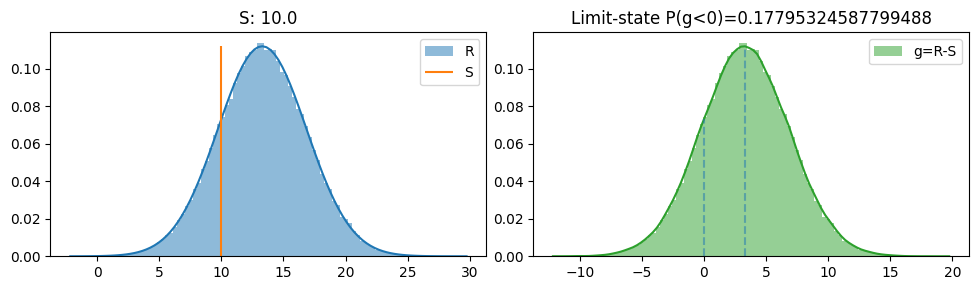

In [5]:
# Run the calibrated membrane model for 10 years
mem_model_cal.run(10)

# Post-process and plot the calibrated results
mem_model_cal.postproc(plot=True)

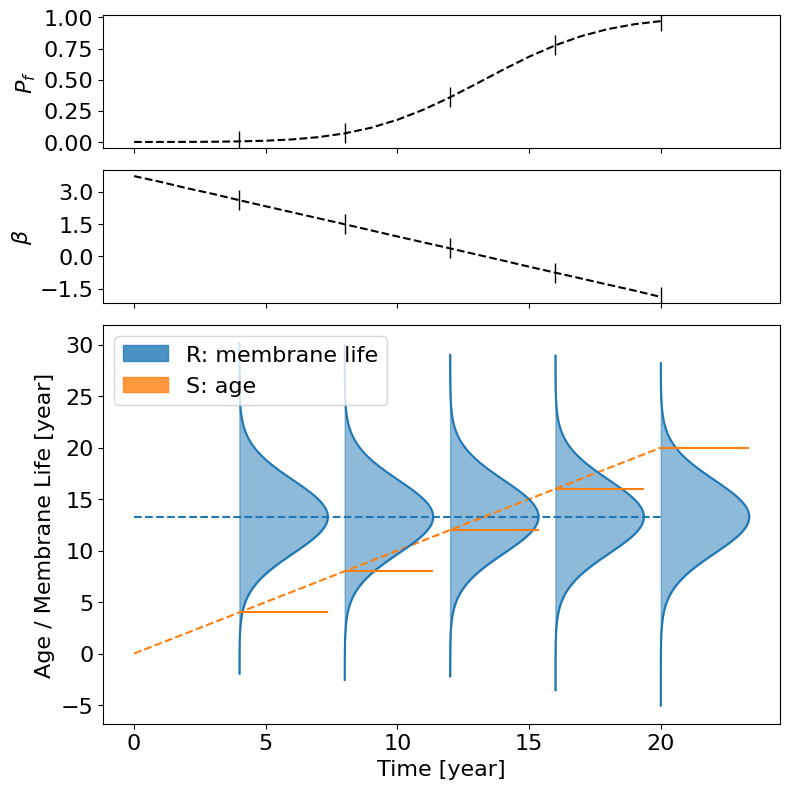

In [6]:
# Run the calibrated membrane model for a list of time steps (0 to 20 years)
t_lis = np.arange(0, 21, 1)  # Define time steps from 0 to 20 years

# Calculate probability of failure (P_f) and reliability index (β) over the time steps
pf_lis, beta_lis = mem_model_cal.membrane_failure_with_year(
    year_lis=t_lis,  # Time steps
    plot=True,       # Plot the results
    amplify=30       # Amplification factor for better visualization
)
